# HOMEWORK No. 4

In [155]:
%pylab inline
rcParams['figure.figsize'] = (10, 4) #wide graphs by default
from __future__ import print_function
from __future__ import division
from scipy.signal import correlate2d
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.filters import minimum_filter
import PIL
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


### I am looking at consistency and motivic repetition in Jackson Pollock's 1950 painting Autumn Rhythm using cross-correlation. His action paintings of this period— documentations of gesture and movement— are said to have been inspired by the jazz music of the day [1]. It has also been suggested that such drip paintings are fractal in nature [2], and thus repetitive on different scales.  While cross-correlation isn't ideal for detecting modulations in features, I'm curious to see how cross-correlation might reveal some rhythmic-like features in this work, through instances of more direct visual repetition across a given rotation/orientation. Through thresholding at the appropriate upper or lower 2%, 10%, and 20% of the cross-correlated graphs, I will attempt to identify some degrees of motivic variation away from a selected feature. Within this painting, I will analyze the splattering patterns in his layers of both black/brown paint (jp_black), (dark) tan paint (jp_tan), and white paint (jp_white), cross-correlating with four features of two splotch motifs (s1_black/s1_white and s2_black/s2_white) and two line motifs (l1_black/l1_white and l2_black/l2_white).
#### [1] https://www.moma.org/learn/moma_learning/themes/abstract-expressionism
#### [2] http://discovermagazine.com/2001/nov/featpollock

# 0. Initializations

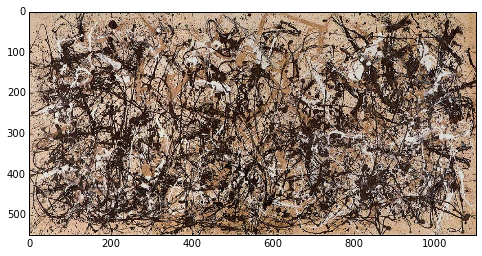

In [35]:
jp = imread('/Users/alexisstorycrawshaw/JP_AutumnRhythm.jpg')
imshow(jp)

In [36]:
jp.dtype

dtype('uint8')

In [37]:
jp.shape

(550, 1100, 3)

<matplotlib.colorbar.Colorbar instance at 0x11347d9e0>

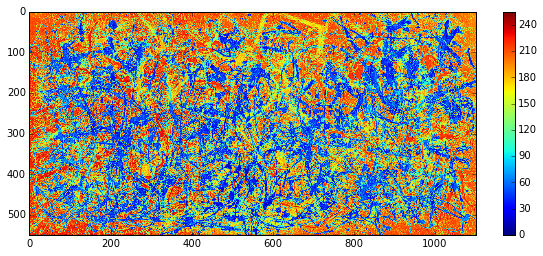

In [38]:
imshow(jp[:,:,0])
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x115fc1ef0>

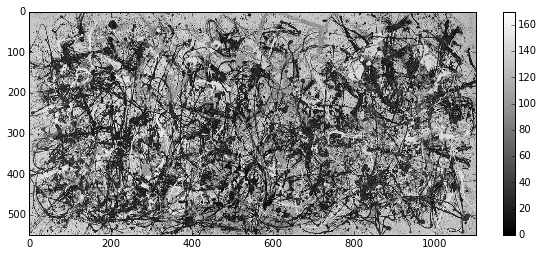

In [39]:
jp = sum(jp[:,:,:-1], axis=2)/3.0
imshow(jp, cmap=cm.gray)
colorbar()

In [40]:
jp= jp[:,:]/255.0;

In [41]:
jp[76, 10]

0.53725490196078429

<matplotlib.colorbar.Colorbar instance at 0x118d76a28>

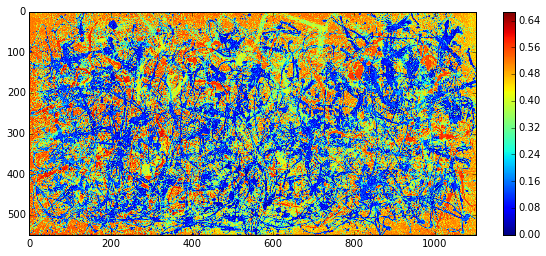

In [42]:
imshow(jp)
colorbar()

## 0.1.1. Black Paint Threshold

In [43]:
jp_black = where(jp < 0.25, 0, 1)
imshow(jp_black, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x117982200>

## 0.1.2. White Paint Threshold

<matplotlib.colorbar.Colorbar instance at 0x1198b30e0>

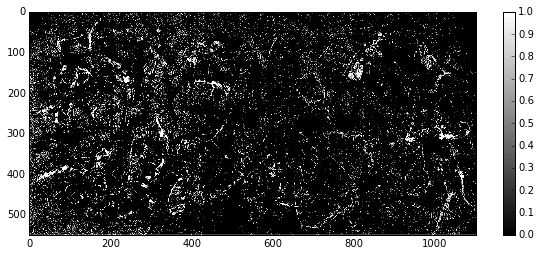

In [44]:
jp_white = where(jp > 0.555, 1, 0)
imshow(jp_white, cmap='gray')
colorbar()

## 0.1.3. (Dark) Tan Paint Threshold

In [45]:
jp_tan = where(logical_and(jp < 0.46, jp > 0.35), 0, 1)
imshow(jp_tan, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11b2459e0>

## 0.2.1. Splotch 1

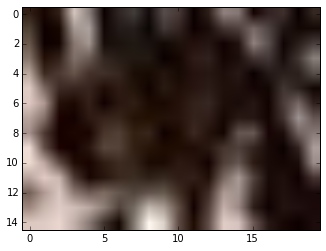

In [46]:
s1= imread('/Users/alexisstorycrawshaw/JP_splotch1.jpg')
imshow(s1)

In [47]:
s1 = sum(s1[:,:,:-1], axis=2)/3.0
imshow(s1, cmap=cm.gray)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11c06c128>

In [48]:
s1= s1[:,:]/255.0;

In [49]:
imshow(s1)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11c37fd40>

In [50]:
s1_black = where(s1 < 0.20, 0, 1)
imshow(s1_black, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11c7f14d0>

<matplotlib.colorbar.Colorbar instance at 0x11cb16368>

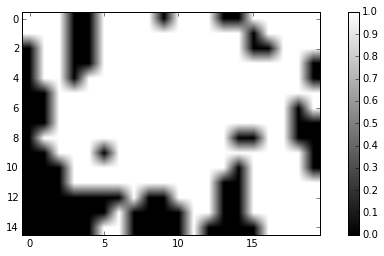

In [51]:
s1_white = where(s1 < 0.20, 1, 0)
imshow(s1_white, cmap='gray')
colorbar()

## 0.2.2. Splotch 2

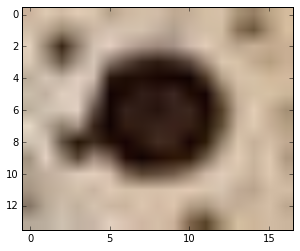

In [52]:
s2= imread('/Users/alexisstorycrawshaw/JP_splotch2.jpg')
imshow(s2)

<matplotlib.colorbar.Colorbar instance at 0x11cf12c20>

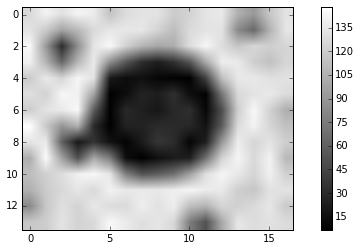

In [53]:
s2 = sum(s2[:,:,:-1], axis=2)/3.0
imshow(s2, cmap=cm.gray)
colorbar()

In [54]:
s2= s2[:,:]/255.0;

<matplotlib.colorbar.Colorbar instance at 0x11d914f80>

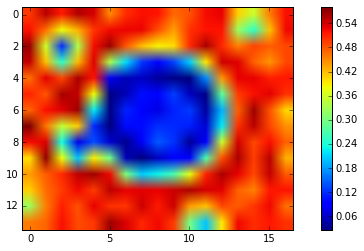

In [55]:
imshow(s2)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11dc60b48>

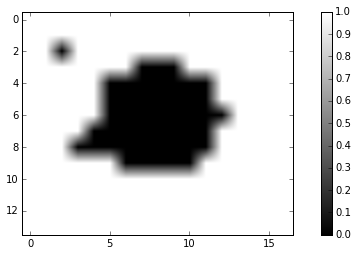

In [56]:
s2_black = where(s2 < 0.20, 0, 1)
imshow(s2_black, cmap='gray')
colorbar()

In [57]:
s2_white = where(s2 < 0.20, 1, 0)
imshow(s2_white, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11de727a0>

In [169]:
s2_black.shape

(14, 17)

In [171]:
s2s_black=s2_black[::2,::2]
s2s_black.shape

(7, 9)

In [173]:
imshow(s2s_black, cmap='gray')

In [175]:
s2_black.size

238

In [180]:
win_startx = arange(0, (14))
win_starty = arange (0, (17))
win_len = 1

s2l_black = []

for start in win_startx:
    for start in win_starty:
    s2l_black.append(s2_black[])
    s2l_black.append(s2_black[])
    
imshow(s2l_black)

IndentationError: expected an indented block (<ipython-input-180-1518626783b8>, line 9)

In [151]:
win_startx = arange(0, (14*2))
win_starty = arange (0, (17*2))
win_len = 2

s2l_black = []

for start in win_startx:
    for start in win_starty:
    ncell=s2_black[start:start + win_len]
    win = s2_black[start: start + win_len, start]
    s2l_black.append(abs(X)/float(win_len/2))


height, width= s2_black.shape[:2]
s2s_black=cv2.resize(s2_black, (0.5*width, 0.5*height),interpolation=INTER_AREA)
imshow(s2s_black)

NameError: name 'cv2' is not defined

<matplotlib.colorbar.Colorbar instance at 0x1200ff908>

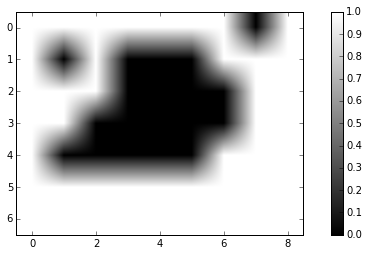

In [174]:
s2small=imread('/Users/alexisstorycrawshaw/JP_splotch2small.jpg')
s2small = sum(s2small[:,:,:-1], axis=2)/3.0
s2small= s2small[:,:]/255.0;
s2small_black = where(s2small < 0.40, 0, 1)
imshow(s2small_black, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10afd65a8>

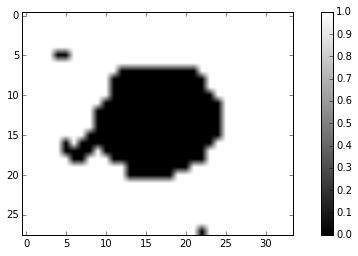

In [168]:
s2big=imread('/Users/alexisstorycrawshaw/JP_splotch2big.jpg')
s2big = sum(s2big[:,:,:-1], axis=2)/3.0
s2big= s2big[:,:]/255.0;
s2big_black = where(s2big < 0.20, 0, 1)
imshow(s2big_black, cmap='gray')
colorbar()

In [58]:
s = correlate2d(s1_black, s2_black)
imshow(s, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

## 0.3.1. Line 1

In [59]:
l1= imread('/Users/alexisstorycrawshaw/JP_line1.jpg')
imshow(l1)

<matplotlib.colorbar.Colorbar instance at 0x11e791128>

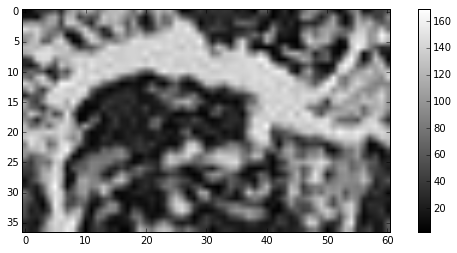

In [60]:
l1 = sum(l1[:,:,:-1], axis=2)/3.0
imshow(l1, cmap=cm.gray)
colorbar()

In [61]:
l1= l1[:,:]/255.0;

<matplotlib.colorbar.Colorbar instance at 0x11de8fc20>

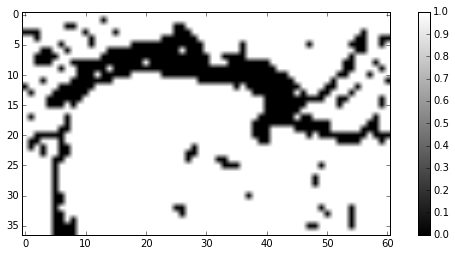

In [62]:
l1_black = where(l1 > 0.51, 0, 1)
imshow(l1_black, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11eb74638>

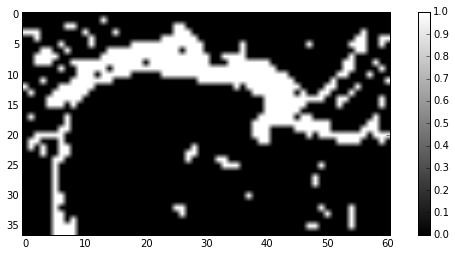

In [63]:
l1_white = where(l1 > 0.51, 1, 0)
imshow(l1_white, cmap='gray')
colorbar()

## 0.3.2. Line 2 

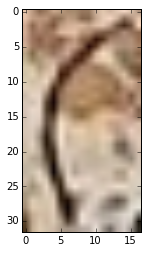

In [64]:
l2= imread('/Users/alexisstorycrawshaw/JP_line2.jpg')
imshow(l2)

<matplotlib.colorbar.Colorbar instance at 0x11ef7db90>

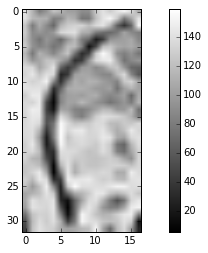

In [65]:
l2 = sum(l2[:,:,:-1], axis=2)/3.0
imshow(l2, cmap=cm.gray)
colorbar()

In [66]:
l2= l2[:,:]/255.0;

<matplotlib.colorbar.Colorbar instance at 0x11f0e5c68>

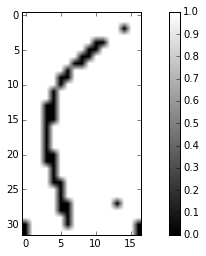

In [67]:
l2_black = where(l2 < 0.22, 0, 1)
imshow(l2_black, cmap='gray')
colorbar()

In [68]:
l2_white = where(l2 < 0.22, 1, 0)
imshow(l2_white, cmap='gray')
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11f4627e8>

In [132]:
l = correlate2d(l1_black, l2_black)
imshow(l, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

# 1. Black Splatter Cross-Correlation

## 1.1.1. For Splotch 1

In [70]:
cc1_b = correlate2d(jp_black, s1_black)
imshow(cc1_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

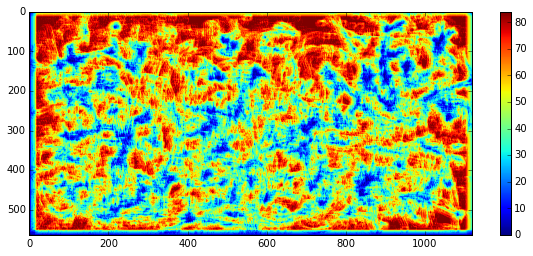

In [71]:
imshow(cc1_b)
colorbar()
gcf().set_figheight(4)

In [72]:
from numpy import amax
cc1_bmax=amax(cc1_b)

In [73]:
subplot(131)
imshow(where(cc1_b < (cc1_bmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc1_b < (cc1_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc1_b < (cc1_bmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### The Splotch 1 feature appears to be a rather common motif, with about 6 very close instances of it at 2% and many variations as one thresholds out to 10% and 20%.

In [74]:
subplot(121)
imshow(maximum_filter(cc1_b, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(cc1_b, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter best demonstrates the high instance of close matches throughout the painting.

## 1.1.2. For Splotch 2

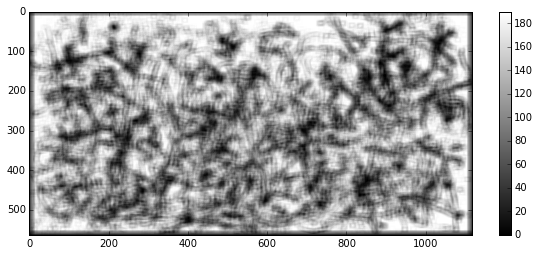

In [75]:
cc2_b = correlate2d(jp_black, s2_black)
imshow(cc2_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

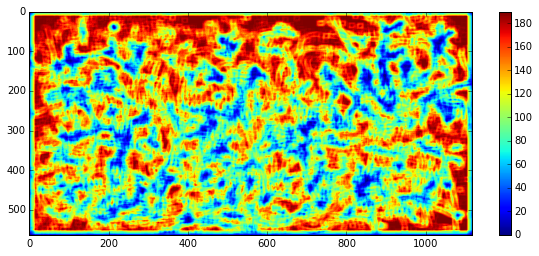

In [76]:
imshow(cc2_b)
colorbar()
gcf().set_figheight(4)

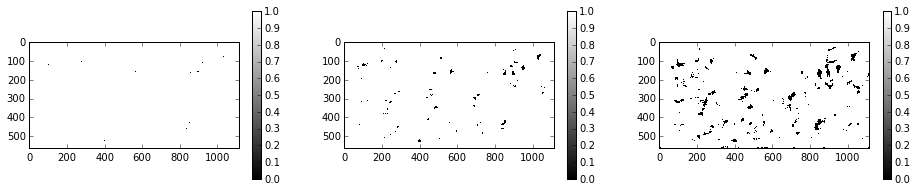

In [77]:
cc2_bmax=amax(cc2_b)
subplot(131)
imshow(where(cc2_b < (cc2_bmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc2_b < (cc2_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc2_b < (cc2_bmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### The Splotch 2 feature also appears to be a rather common motif, with around 10 close instances at 2%. This splotch also has many variations evident at 10% and 20%. 

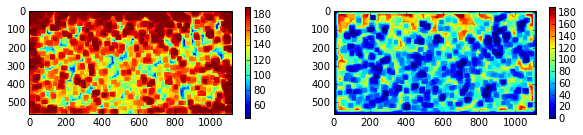

In [78]:
subplot(121)
imshow(maximum_filter(cc2_b, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(cc2_b, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter also effectively demonstrates the high instance of close matches of the Splotch 2 motif. In comparison to the Splotch 1 mimimum filter, we see slightly less concentration of blue overall for Splotch 2, suggesting less variations under 33% overall, even though Splotch 2 does seem to have a higher instance of close matches, as demonstrated by the thresholding in the previous cell.

## 1.2.1. For Line 1

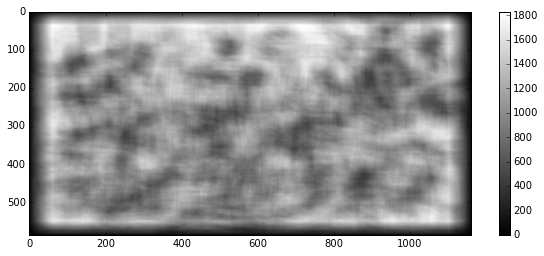

In [79]:
ccl1_b = correlate2d(jp_black, l1_black)
imshow(ccl1_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

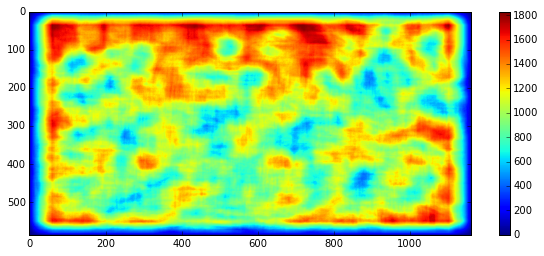

In [80]:
imshow(ccl1_b)
colorbar()
gcf().set_figheight(4)

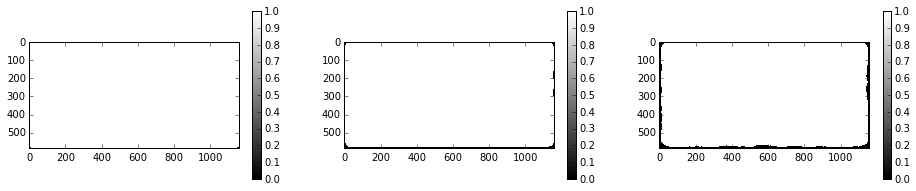

In [81]:
ccl1_bmax=amax(ccl1_b)
subplot(131)
imshow(where(ccl1_b < (ccl1_bmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl1_b < (ccl1_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl1_b < (ccl1_bmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

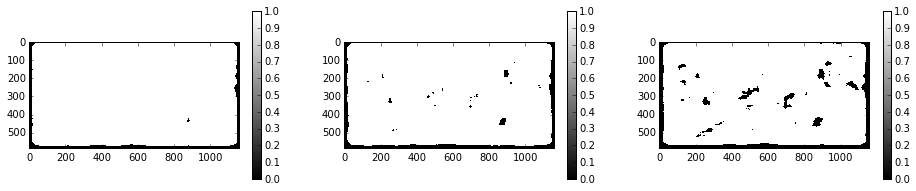

In [82]:
subplot(131)
imshow(where(ccl1_b < (ccl1_bmax*.25), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl1_b < (ccl1_bmax*.30), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl1_b < (ccl1_bmax*.35), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### For Line 1, aside from what appear to be artifacts around the edges, there are no substantial matches or variations under 20%. It takes until about 25% to get any kind of match.

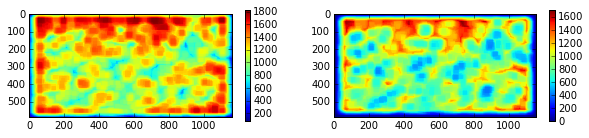

In [83]:
subplot(121)
imshow(maximum_filter(ccl1_b, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl1_b, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter shows the paucity of variations or matches under about 33%. 

## 1.2.2. For Line 2 

In [84]:
ccl2_b = correlate2d(jp_black, l2_black)
imshow(ccl2_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

In [85]:
imshow(ccl2_b)
colorbar()
gcf().set_figheight(4)

In [86]:
ccl2_bmax=amax(ccl2_b)
subplot(131)
imshow(where(ccl2_b < (ccl2_bmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl2_b < (ccl2_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl2_b < (ccl2_bmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

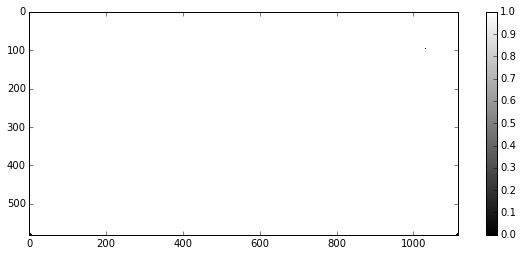

In [87]:
imshow(where(ccl2_b < (ccl2_bmax*.04), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

###### Even though the Line 2 motif was taken from a black/brown paint splatter, the closest match is not acknowledged until about 4%. This might be due to the thresholding to simplify the initial motive image. The CC thresholding at 10% and 20% suggests a fair amount of other variations, though still perhaps less than for the two splotch motifs. 

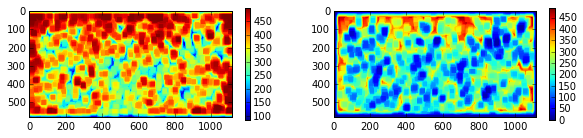

In [88]:
subplot(121)
imshow(maximum_filter(ccl2_b, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl2_b, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The mimimum filter shows a fair amount of variation under about 33%, though less than that for the two splotch motifs.

## 1.3. Comparisons (Black Splatter)

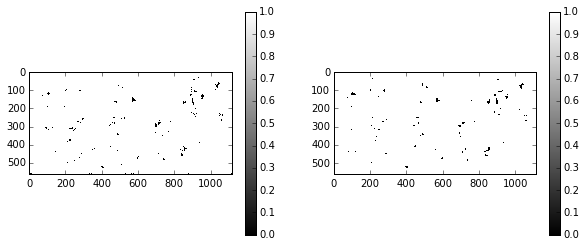

In [89]:
#Splotches
subplot(121)
imshow(where(cc1_b < (cc1_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
subplot(122)
imshow(where(cc2_b < (cc2_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

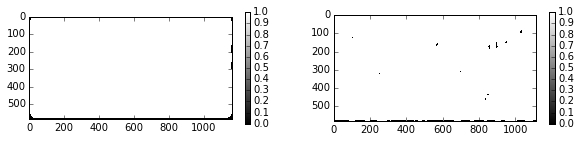

In [90]:
#Lines
subplot(121)
imshow(where(ccl1_b < (ccl1_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(where(ccl2_b < (ccl2_bmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)

###### Many of the highest instances of correlation for S1, S2, and L2 are in similar locations. It seems as though the differences between these features around CC 10% are still rather ambiguous. The splotches have many and more similarities between them, and all L2 motifs seem to resemble the splotches at 10%. As such, thresholding further might prove more interesting to better distinguish between the features:

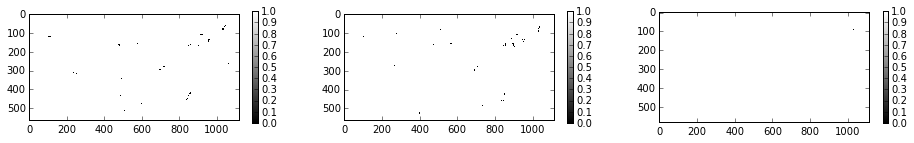

In [91]:
#4% for S1, S2, L2
subplot(131)
imshow(where(cc1_b < (cc1_bmax*.04), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)
subplot(132)
imshow(where(cc2_b < (cc2_bmax*.04), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)
subplot(133)
imshow(where(ccl2_b < (ccl2_bmax*.04), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)
gcf().set_figwidth(16)

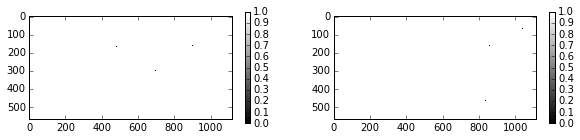

In [92]:
#1% S1 and S2
subplot(121)
imshow(where(cc1_b < (cc1_bmax*.01), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(where(cc2_b < (cc2_bmax*.01), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(2)

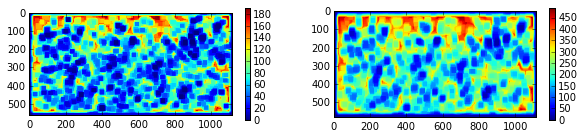

In [93]:
#Min. filter for S2 and L2
subplot(121)
imshow(minimum_filter(cc2_b, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl2_b, (20,20)))
colorbar()
gcf().set_figheight(2)

###### By 1%, S1 and S2 are more differentiated. In looking at the thresholded graphs and minimum filter graphs of S2 and L2, it seems one point in S2 might potentially overlap with the closest match in L2 (at 4%), or the two features might just be quite nearby to one another. 

# 2. White Splatter Cross-Correlation

## 2.1.1. For Splotch 1

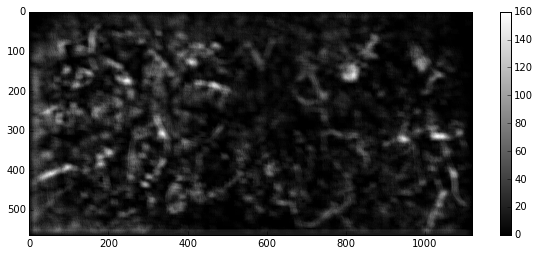

In [94]:
cc1_w = correlate2d(jp_white, s1_white)
imshow(cc1_w, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

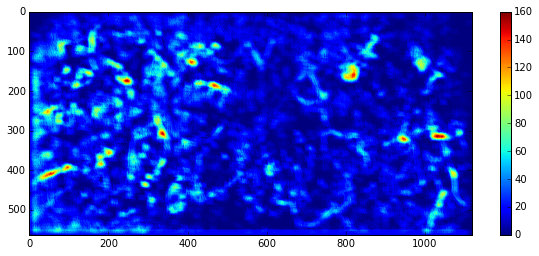

In [95]:
imshow(cc1_w)
colorbar()
gcf().set_figheight(4)

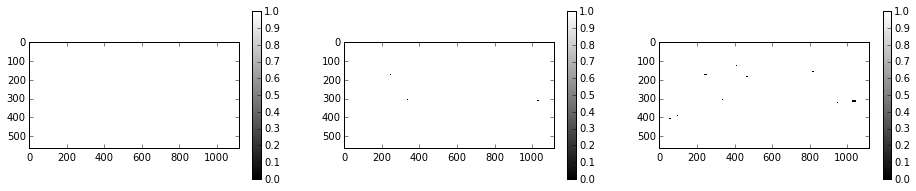

In [96]:
cc1_wmax=amax(cc1_w)
subplot(131)
imshow(where(cc1_w > (cc1_wmax * 0.98), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc1_w > (cc1_wmax * 0.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc1_w > (cc1_wmax * 0.80), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### Close matches are absent in the upper 2%, but there are 3 at 10%, and there's a scattering of matches at 20%. Already we see that there is less approximation to S1 in the white splatters than in the black splatters.

<matplotlib.colorbar.Colorbar instance at 0x10b742c20>

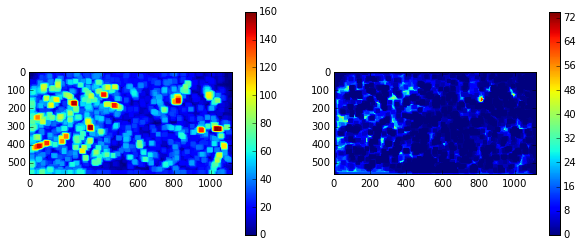

In [97]:
subplot(121)
imshow(maximum_filter(cc1_w, (20,20)))
colorbar()
subplot(122)
imshow(minimum_filter(cc1_w, (20,20)))
colorbar()

###### For the white splatters, the maximum filter will be most relevant for demonstrating the presence of closer matches/variations. There are a handful of clear possibilities highlighted in the upper 33%. 

## 2.1.2. For Splotch 2

In [98]:
cc2_w = correlate2d(jp_white, s2_white)
imshow(cc2_w, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

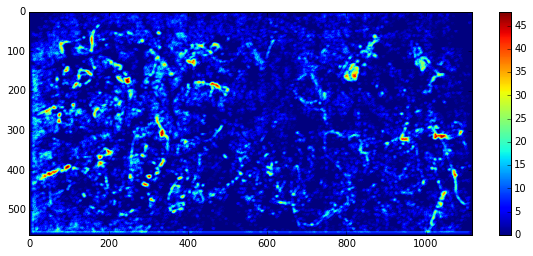

In [99]:
imshow(cc2_w)
colorbar()
gcf().set_figheight(4)

In [100]:
cc2_wmax=amax(cc2_w)
subplot(131)
imshow(where(cc2_w > (cc2_wmax * 0.98), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc2_w > (cc2_wmax * 0.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc2_w > (cc2_wmax * 0.80), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)


###### Similarly to S1, for S2, there are no close matches in the upper 2%, but some at 10% and 20%. At 10%, we see more possibilities than for S1, suggesting that more looser variations on S2 than S1 might appear in the white splatters. Furher thresholding and analysis will follow in the comparisions section farther below.

In [101]:
subplot(121)
imshow(maximum_filter(cc2_w, (20,20)))
colorbar()
subplot(122)
imshow(minimum_filter(cc2_w, (20,20)))
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11f5377e8>

###### Again, the maximum filter here shows potential matches/variations, with a greater number of them in the top 33% than for S1.

## 2.2.1. For Line 1

In [102]:
ccl1_w = correlate2d(jp_white, l1_white)
imshow(ccl1_w, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

In [103]:
imshow(ccl1_w)
colorbar()
gcf().set_figheight(4)

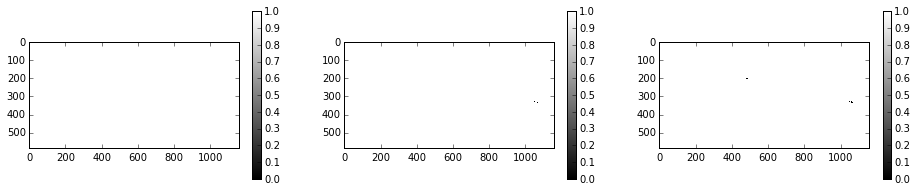

In [104]:
ccl1_wmax=amax(ccl1_w)
subplot(131)
imshow(where(ccl1_w > (ccl1_wmax*0.98), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl1_w > (ccl1_wmax*0.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl1_w > (ccl1_wmax*0.80), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

In [105]:
imshow(where(ccl1_w > (ccl1_wmax*0.94), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x11f558ef0>

###### L1, a white paint motif, is not noted in the upper 2%, and the closest reported match doesn't occur until about 6%, in the approximate spot where it appears in the painting, but seemingly more to the far right. This may be an error related to the thresholding done to simplify the motif image, or may be just an offset caused by the CC algorithm. In any case, by 20%, the CC algorithm only identifies about 3 matches/variations. 

In [106]:
subplot(121)
imshow(maximum_filter(ccl1_w, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl1_w, (20,20)))
colorbar()
gcf().set_figheight(2)

###### From the maximum filter, we see that L1 is a more particular feature in the while paint splatters, with only a few looser potential variations in the upper 33%, and 1-2 closer echoes. 

## 2.2.2. For Line 2 

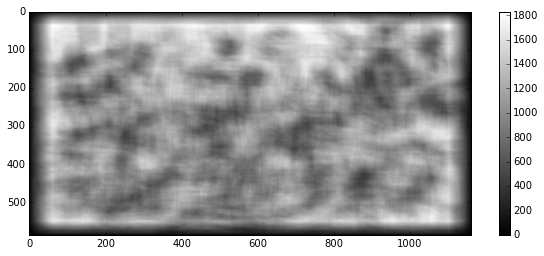

In [107]:
ccl2_w = correlate2d(jp_white, l2_white)
imshow(ccl1_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

In [108]:
imshow(ccl2_w)
colorbar()
gcf().set_figheight(4)

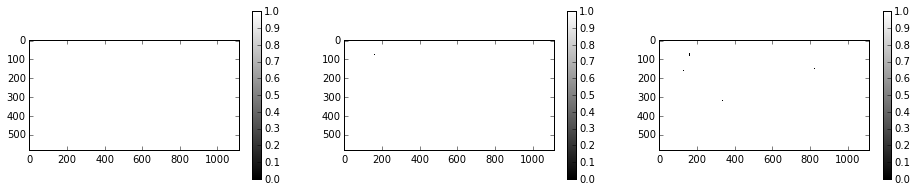

In [109]:
ccl2_wmax=amax(ccl2_w)
subplot(131)
imshow(where(ccl2_w > (ccl2_wmax*0.98), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl2_w > (ccl2_wmax*0.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl2_w > (ccl2_wmax*0.80), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

In [110]:
imshow(where(ccl2_w > (ccl2_wmax*0.92), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)

###### For L2, there are no tight matches in the white splatters until thresholding out to about the upper 8%. By 20%, we see a few more potential loose variations, more so than for L1.

In [111]:
subplot(121)
imshow(maximum_filter(ccl2_w, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl2_w, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The maximum filter shows a scattering of quite loose potential variations in the upper 33%, but less stronger fits than for L1. 

## 2.3. Comparisons (White Splatter)

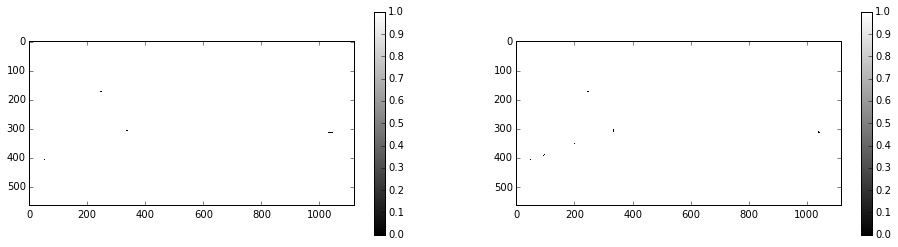

In [112]:
#Splotches
subplot(121)
imshow(where(cc1_w > (cc1_wmax*.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
subplot(122)
imshow(where(cc2_w > (cc2_wmax*.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
gcf().set_figwidth(16)

In [113]:
#Lines
subplot(121)
imshow(where(ccl1_w > (ccl1_wmax*0.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
subplot(122)
imshow(where(ccl2_w > (ccl2_wmax*.90), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
gcf().set_figwidth(16)

In [114]:
#Splotches (again at 5%)
subplot(121)
imshow(where(cc1_w > (cc1_wmax*.95), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
subplot(122)
imshow(where(cc2_w > (cc2_wmax*.95), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(4)
gcf().set_figwidth(16)

###### The splotch motifs seem to have more variations in the upper 10% of CC than do the line motifs. Again, as with the splotch motifs in the black paint, we see that there is spatial overlap with the splotch motifs at 10%— they are more differentiated at about 5%. Also at 5%, S1 and S2 are also localized to the closest matched region for L1, perhaps demonstrating the splotchy and less distinctive nature of the L1 motif itself.

# 3. Tan Splatter Cross-Correlation

## 3.1.1. For Splotch 1

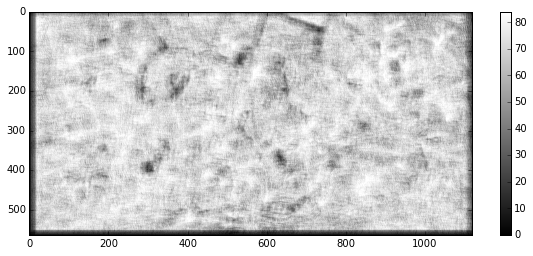

In [115]:
cc1_t = correlate2d(jp_tan, s1_black)
imshow(cc1_t, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

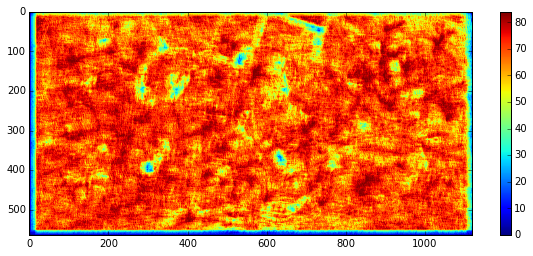

In [116]:
imshow(cc1_t)
colorbar()
gcf().set_figheight(4)

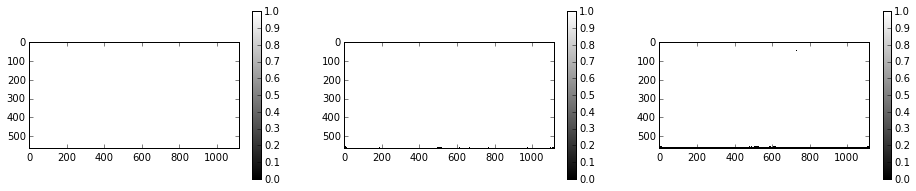

In [117]:
cc1_tmax=amax(cc1_t)
subplot(131)
imshow(where(cc1_t < (cc1_tmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc1_t < (cc1_tmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc1_t < (cc1_tmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### The S1 motif is much more rare in the tan layer, with only one point at 20%, bearing any loose correlation to it. 

In [118]:
subplot(121)
imshow(maximum_filter(cc1_t, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(cc1_t, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter affirms this relative scarcity of correlation, with only a few points in the top 33% of correlation.

## 3.1.2. For Splotch 2

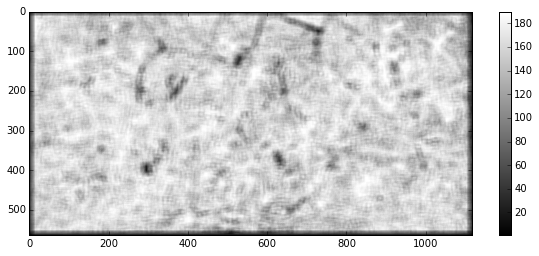

In [119]:
cc2_t = correlate2d(jp_tan, s2_black)
imshow(cc2_t, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

In [120]:
imshow(cc2_t)
colorbar()
gcf().set_figheight(4)

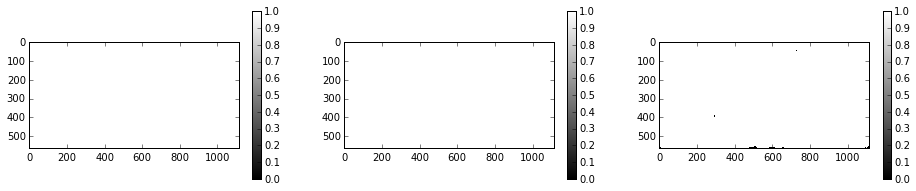

In [121]:
cc2_tmax=amax(cc2_t)
subplot(131)
imshow(where(cc2_t < (cc2_tmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(cc2_t < (cc2_tmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(cc2_t < (cc2_tmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### Again, very liitle correlation with the S2 motif either, with only two points at 20% (and with what seems to be some artifacts at the edges). The point in the upper right quadrant appears to correspond to the closest S1 match. 

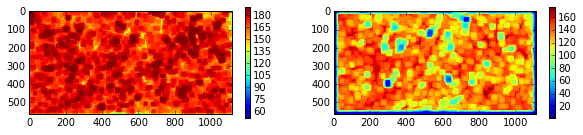

In [122]:
subplot(121)
imshow(maximum_filter(cc2_t, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(cc2_t, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The mimimum filter shows only 4-5 points with some correlation within 33%, less numerous than for S1, but with stronger matches, given the darker color (comparing with the mimimum filter at the end of Section 3.1.1.). 

## 3.2.1. For Line 1 

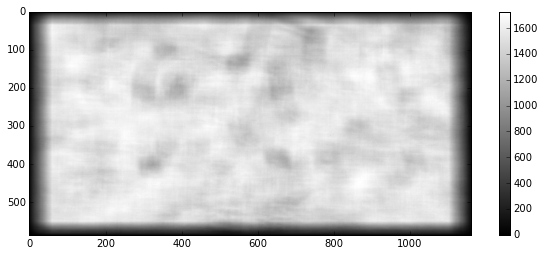

In [123]:
ccl1_t = correlate2d(jp_tan, l1_black)
imshow(ccl1_t, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

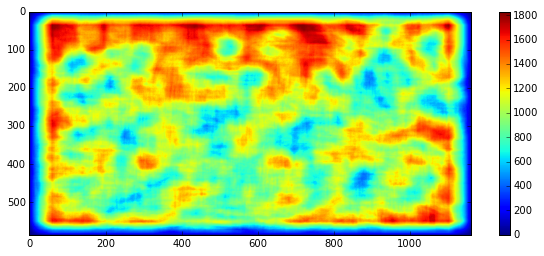

In [124]:
imshow(ccl1_b)
colorbar()
gcf().set_figheight(4)

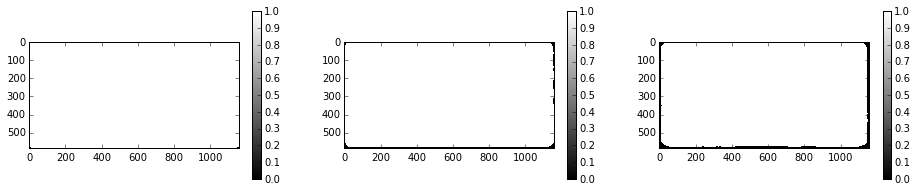

In [125]:
ccl1_tmax=amax(ccl1_t)
subplot(131)
imshow(where(ccl1_t < (ccl1_tmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl1_t < (ccl1_tmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl1_t < (ccl1_tmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### With the exception of some apparent artifacts around the edges, there is no evidence of significant correlation with the L1 motif. 

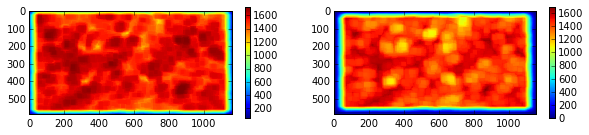

In [126]:
subplot(121)
imshow(maximum_filter(ccl1_t, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl1_t, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter affirms the absence of correlation, with no significant points within 33% correlation, except the edges (likely artifacts).

## 3.2.2. For Line 2

In [127]:
ccl2_t = correlate2d(jp_tan, l2_black)
imshow(ccl2_b, cmap=cm.gray)
colorbar()
gcf().set_figheight(4)

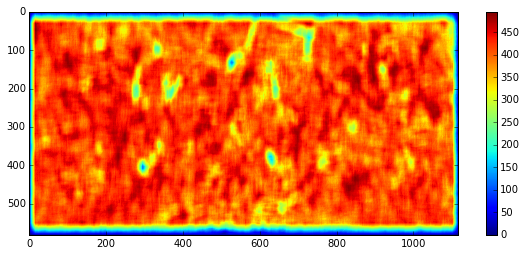

In [128]:
imshow(ccl2_t)
colorbar()
gcf().set_figheight(4)

In [129]:
ccl2_tmax=amax(ccl2_t)
subplot(131)
imshow(where(ccl2_t < (ccl2_tmax*.02), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(132)
imshow(where(ccl2_t < (ccl2_tmax*.10), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(133)
imshow(where(ccl2_t < (ccl2_tmax*.20), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### As with the L1 motif, there are no clear points of correlation, except for what appears to be artifacts around the edges (due to the initial tan paint layer thresholding). 

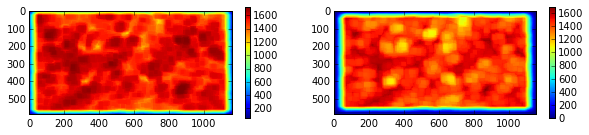

In [130]:
subplot(121)
imshow(maximum_filter(ccl1_t, (20,20)))
colorbar()
gcf().set_figheight(2)
subplot(122)
imshow(minimum_filter(ccl1_t, (20,20)))
colorbar()
gcf().set_figheight(2)

###### The minimum filter again demonstrates the absence of any significant correlation within 33% except for likely artifacts along the edges. 

## 3.3. Comparisons (Tan Splatter)

In [131]:
#Splotches (no Lines, as the Line graphs showed no relevant correlation)
subplot(121)
imshow(where(cc2_t < (cc1_tmax*.12), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
subplot(122)
imshow(where(cc2_t < (cc2_tmax*.12), 0, 1), interpolation='nearest', cmap=cm.gray)
colorbar()
gcf().set_figheight(3)
gcf().set_figwidth(16)

###### There is but one small, lone point at 12% correlation, seemingly shared by both S1 and S2. Similar splotch-like motifs are fairly absent at this scale in this paint layer— only a few, greatly varied ones, as the other, earlier graphs suggest. The line motifs have no loose variations, as the earlier graphs in Sections 3.2.1. and 3.2.2. demonstrate. The graphs suggest that the tan paint layer is the most different layer when it comes to these particular motifs.

# 4. Discussion and Conclusion

###### It seems that the motifs themselves were not entirely distinctive. L2 proved quite splotchy given the analyses done on the white paint splatters, discussed in section 2.3. above. Over the other analyses of the different colored splatters, it was discovered that the motifs were not as differentiated until less than the lower (or upper, if appropriate) 10% of cross-correlation, where the splotch motifs were still sometimes confused for the line motifs. The two splotch motifs became more distinct from one another around 4-5%.
###### In terms of ubiquity, it seems that the chosen splotch motifs were more frequent than the chosen line motifs throughout the three layers of color, with perhaps S2 proving the most repeated (both closely and with variations) overall. With respect to gauging motivic consistency in the painting, there were instances of high thresholding ( < 2%) in the black paint layer where splotch motifs seemed to be echoed in several locations. Lower but still close thresholding at < 5% suggested several variations of the splotches across the white splatter. The chosen line motifs were more particular, with less scattered echoes or variations across the layers in general. As mentioned earlier, the tan layer had the least amount of repetition or variation of the chosen motives.
###### For future work, it would be good to further optimize the accuracy of the initial threholded motifs and colored layers, and perhaps to choose some more distintive motifs, given the problems found here. Additionally, it would be interesting to flip and rotate the motifs (and play with scaling) to find some of the additional potential ways these motifs may have been employed. Hopefully such investigation could help to elucidate a lexicon of gestures Pollock may have chosen to create this painting, guiding the creation of any of the particular layers. Further investigation into such a possible lexicon might better demonstrate to what extent the layers may be (gesturally/visually) linguistically linked.